<a href="https://colab.research.google.com/github/15nov2002/Exploratory-Data-Analysis/blob/main/21BDS0353.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/opt.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

   rownames     PID Clinic Group  Age Black White Nat.Am Asian Hisp  ...  \
0         1  100034     NY     C   25   Yes   No     No    No        ...   
1         2  100042     NY     C   21   Yes   No     No    No        ...   
2         3  100067     NY     T   25   No    Yes    No    No   Yes  ...   
3         4  100083     NY     C   36   Yes   No     No    No        ...   
4         5  100091     NY     C   21   No    Yes    No    No   Yes  ...   

  BL..FN BL..S7 V5..AA V5..PG V5..TD  V5..TF V5..PI  V5..CR V5..FN  V5..S7  
0    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
1  22.15  33.02    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
2  12.51  23.31    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  

[5 rows x 172 columns]


In [ ]:
# Check the dimensions of the dataset
print(f"Dataset Dimensions: {df.shape}")

Dataset Dimensions: (823, 172)


In [ ]:
# Generate summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Columns: 172 entries, rownames to V5..S7
dtypes: float64(86), int64(13), object(73)
memory usage: 1.1+ MB
None
        rownames            PID         Age         BMI  BL.Cig.Day  \
count  823.00000     823.000000  823.000000  750.000000   92.000000   
mean   412.00000  252541.347509   25.978129   27.669333    8.717391   
std    237.72393  106737.056578    5.565973    7.127299    6.271032   
min      1.00000  100034.000000   16.000000   15.000000    1.000000   
25%    206.50000  200501.000000   22.000000   23.000000    5.000000   
50%    412.00000  202717.000000   25.000000   26.000000    7.500000   
75%    617.50000  302208.000000   30.000000   31.000000   10.000000   
max    823.00000  402477.000000   44.000000   68.000000   30.000000   

       BL.Drks.Day  N.prev.preg  N.living.kids     Tx.time  N.extractions  \
count    13.000000   606.000000     522.000000  395.000000     447.000000   
mean      4.461538     

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/opt.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("Initial Dataset:")
print(df.head())

# Step 1: Check Dataset Information
print("\nDataset Information:")
print(df.info())

# Step 2: Check for Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Step 3: Handle Missing Valuese
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # Numerical columns
        df[col].fillna(df[col].median(), inplace=True)
    elif df[col].dtype == 'object':  # Categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify if missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())

# Step 4: Check for Duplicates
print("\nNumber of Duplicates in the Dataset:")
print(df.duplicated().sum())

# Remove Duplicates
df.drop_duplicates(inplace=True)

# Verify if duplicates are removed
print("\nNumber of Duplicates After Removal:")
print(df.duplicated().sum())

# Step 5: Handle Inconsistent Data
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique Values in {col}:")
    print(df[col].unique())

# Standardize categorical columns
for col in categorical_columns:
    df[col] = df[col].str.strip().str.lower()

# Verify standardized categorical columns
for col in categorical_columns:
    print(f"\nStandardized Unique Values in {col}:")
    print(df[col].unique())

# Step 6: Handle Outliers in Numerical Columns

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers to the lower and upper bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Verify if outliers are handled
print("\nOutliers Handled in Numerical Columns.")

# Step 7: Check for Irrelevant Columns
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=constant_columns, inplace=True)

print("\nIrrelevant Columns Removed:")
print(constant_columns)

# Step 8: Convert Data Types (if necessary)
# Convert categorical columns to 'category' type for efficiency
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Convert date columns to datetime

# Verify data types
print("\nUpdated Data Types:")
print(df.dtypes)

# Step 9: Save the Cleaned Dataset
df.to_csv('cleaned_dataset.csv', index=False)

print("\nData Cleaning Completed. Cleaned Dataset Saved as 'cleaned_dataset.csv'.")

Initial Dataset:
   rownames     PID Clinic Group  Age Black White Nat.Am Asian Hisp  ...  \
0         1  100034     NY     C   25   Yes   No     No    No        ...   
1         2  100042     NY     C   21   Yes   No     No    No        ...   
2         3  100067     NY     T   25   No    Yes    No    No   Yes  ...   
3         4  100083     NY     C   36   Yes   No     No    No        ...   
4         5  100091     NY     C   21   No    Yes    No    No   Yes  ...   

  BL..FN BL..S7 V5..AA V5..PG V5..TD  V5..TF V5..PI  V5..CR V5..FN  V5..S7  
0    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
1  22.15  33.02    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
2  12.51  23.31    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  

[5 rows x 172 columns]

Dataset Information:
<class 'pandas.cor

<ipython-input-4-13057364f984>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-4-13057364f984>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 



Unique Values in OTF1:
['7.056' '6.388' '5.893' '4.847' '5.6' '8.916' '5.815' '5.129' '5.385'
 '7.56' '6.097' '6.053' '4.989' '6.707' '6.726' '5.177' '7.051' '5.042'
 '5.621' '6.073' '7.375' '7.833' '3.284' '4.144' '5.728' '5.088' '7.332'
 '4.777' '7.227' '6.305' '4.047' '4.184' '4.696' '6.471' '4.625' '3.907'
 '7.476' '3.905' '5.977' '5.467' '3.684' '5.289' '8.04' '4.311' '4.137'
 '4.445' '3.432' '8.48' '4.529' '8.385' '5.332' '3.746' '3.205' '4.757'
 '4.6' '3.629' '3.07' '1.372' '3.47' '2.598' '8.2' '8.237' '7.019' '5.602'
 '6.927' '7.873' '6.076' '5.803' '2.936' '4.303' '11.228' '4.493' '5.052'
 '.' '6.897' '1.813' '3.596' '6.138' '9.684' '4.712' '4.085' '4.494'
 '5.991' '3.957' '3.858' '7.669' '6.928' '4.68' '5.46' '1.943' '5.457'
 '1.85' '3.193' '2.434' '3.895' '2.531' '1.941' '6.102' '4.354' '1.786'
 '2.889' '11.63' '12.224' '3.19' '7.382' '3.595' '11.657' '6.594' '5.633'
 '16.074' '4.286' '3.521' '1.889' '12.147' '1.612' '12.762' '2.701' '6.41'
 '2.708' '2.272' '4.444' '1.434'

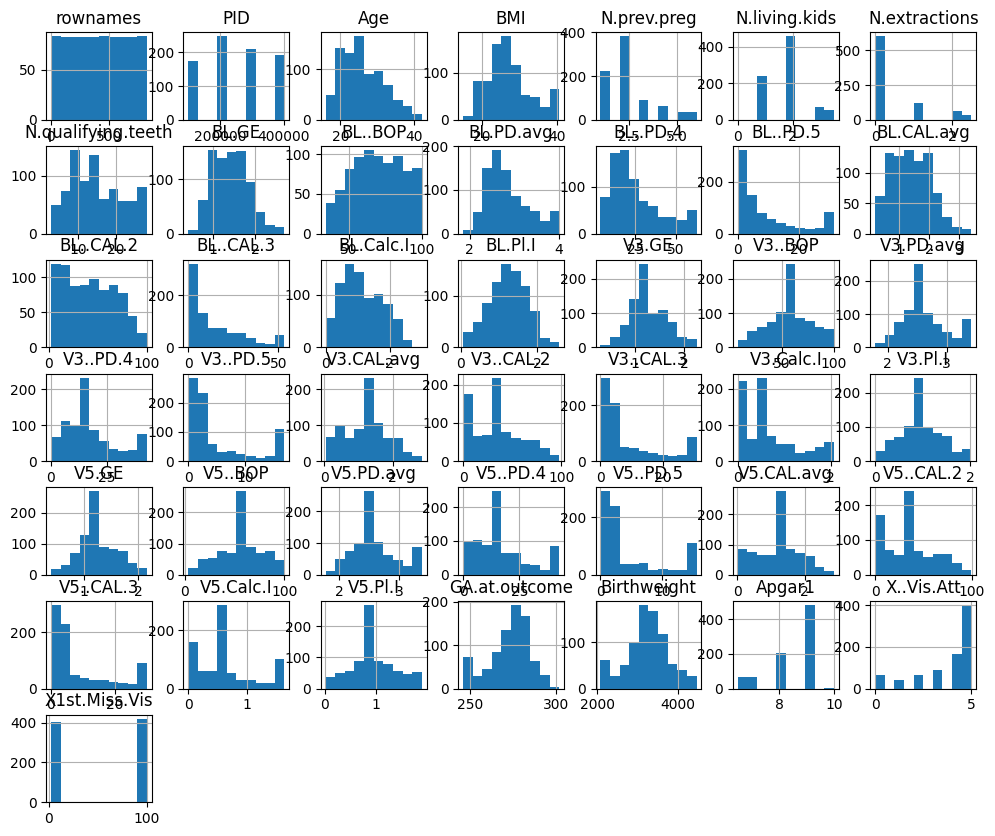

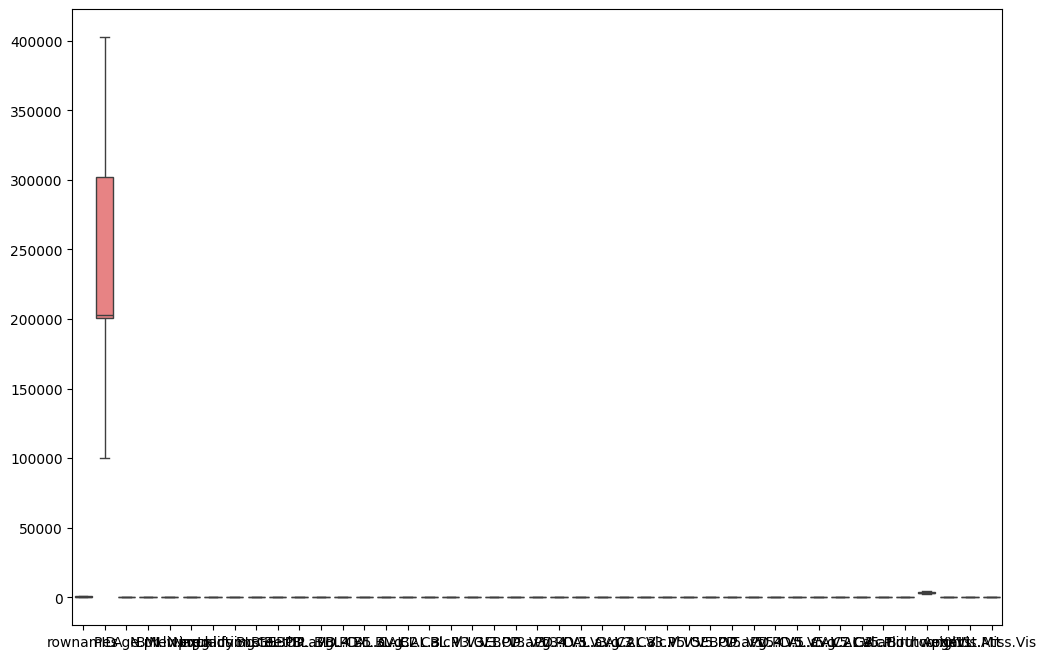

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical columns
df.hist(figsize=(12, 10))
plt.show()

# Boxplot for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

# Count plot for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.show()

Initial Dataset:
   rownames     PID Clinic Group  Age Black White Nat.Am Asian Hisp  ...  \
0         1  100034     NY     C   25   Yes   No     No    No        ...   
1         2  100042     NY     C   21   Yes   No     No    No        ...   
2         3  100067     NY     T   25   No    Yes    No    No   Yes  ...   
3         4  100083     NY     C   36   Yes   No     No    No        ...   
4         5  100091     NY     C   21   No    Yes    No    No   Yes  ...   

  BL..FN BL..S7 V5..AA V5..PG V5..TD  V5..TF V5..PI  V5..CR V5..FN  V5..S7  
0    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
1  22.15  33.02    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
2  12.51  23.31    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  

[5 rows x 172 columns]

Numerical Columns for Univariate Analys

ValueError: num must be an integer with 1 <= num <= 9, not 10

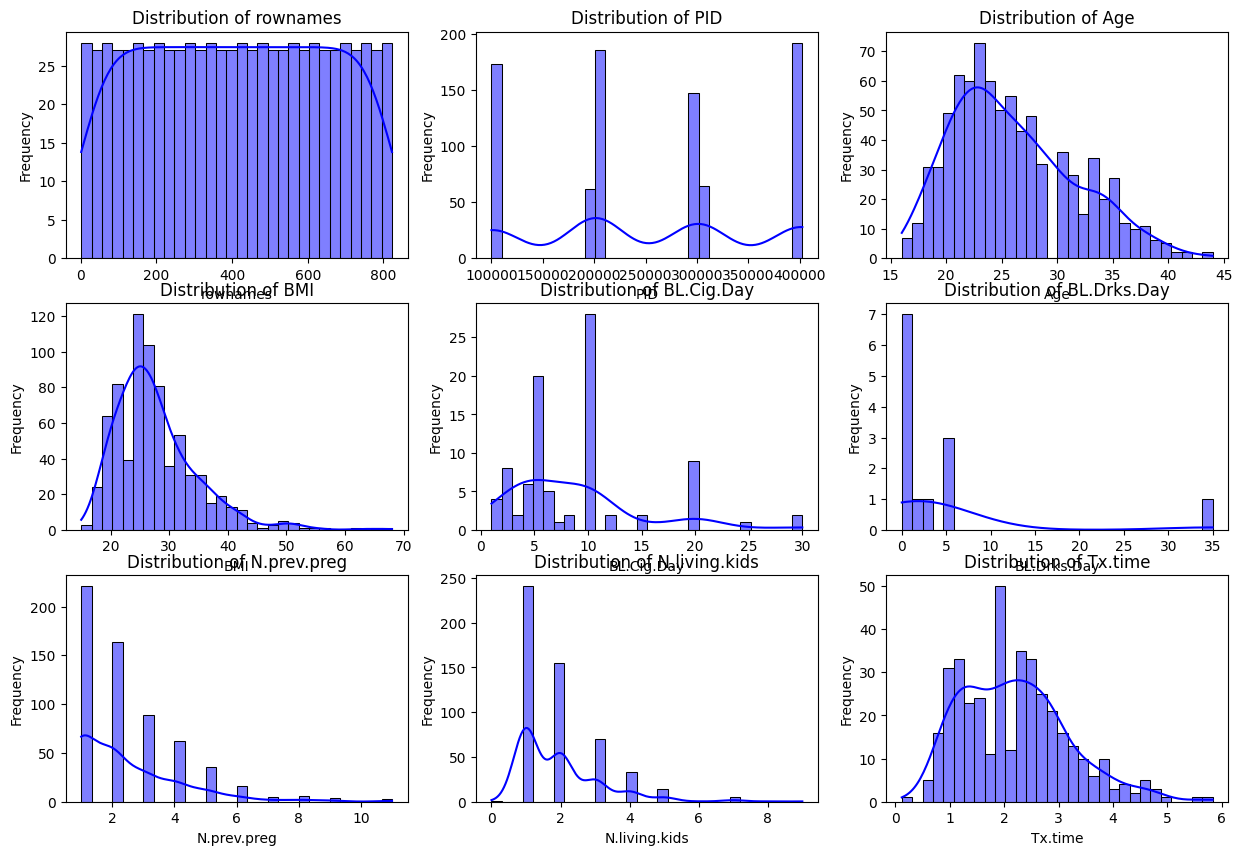

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/opt.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("Initial Dataset:")
print(df.head())

# Step 1: Univariate Analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nNumerical Columns for Univariate Analysis:")
print(numerical_columns)

# Plot histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Categorical Columns: Count Plots
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns for Univariate Analysis:")
print(categorical_columns)

# Plot count plots for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 2: Bivariate Analysi

# 2.1 Numerical vs Numerical: Scatter Plots and Correlation Matrix
plt.figure(figsize=(15, 10))
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=numerical_columns[i], y=numerical_columns[j], alpha=0.6, color='green')
        plt.title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.show()

# Correlation matrix for numerical columns
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

#Numerical vs Categorical: Boxplots and Violin Plots
# Boxplots for numerical vs categorical columns
plt.figure(figsize=(15, 10))
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=cat_col, y=num_col, palette='pastel')
        plt.title(f'{num_col} vs {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.show()

# Violin plots for numerical vs categorical columns
plt.figure(figsize=(15, 10))
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.violinplot(data=df, x=cat_col, y=num_col, palette='pastel')
        plt.title(f'{num_col} vs {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.show()

#  Categorical vs Categorical: Cross-Tabulation and Heatmaps
for cat_col1 in categorical_columns:
    for cat_col2 in categorical_columns:
        if cat_col1 != cat_col2:
            print(f"\nCross-Tabulation of {cat_col1} and {cat_col2}:")
            cross_tab = pd.crosstab(df[cat_col1], df[cat_col2])
            print(cross_tab)

            # Heatmap for cross-tabulation
            plt.figure(figsize=(8, 6))
            sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
            plt.title(f'Heatmap of {cat_col1} vs {cat_col2}')
            plt.xlabel(cat_col2)
            plt.ylabel(cat_col1)
            plt.show()

# Step 3: Multivariate Analysis s
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle('Pairplot for Numerical Columns', y=1.02)
plt.show()

# Pairplot with hue
if len(categorical_columns) > 0:
    sns.pairplot(df, hue=categorical_columns[0], diag_kind='kde')
    plt.suptitle(f'Pairplot with Hue ({categorical_columns[0]})', y=1.02)
    plt.show()

Loading dataset...

Dataset Overview:
Shape: (823, 172)

First few rows:
   rownames     PID Clinic Group  Age Black White Nat.Am Asian Hisp  ...  \
0         1  100034     NY     C   25   Yes   No     No    No        ...   
1         2  100042     NY     C   21   Yes   No     No    No        ...   
2         3  100067     NY     T   25   No    Yes    No    No   Yes  ...   
3         4  100083     NY     C   36   Yes   No     No    No        ...   
4         5  100091     NY     C   21   No    Yes    No    No   Yes  ...   

  BL..FN BL..S7 V5..AA V5..PG V5..TD  V5..TF V5..PI  V5..CR V5..FN  V5..S7  
0    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
1  22.15  33.02    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
2  12.51  23.31    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  

[5 rows

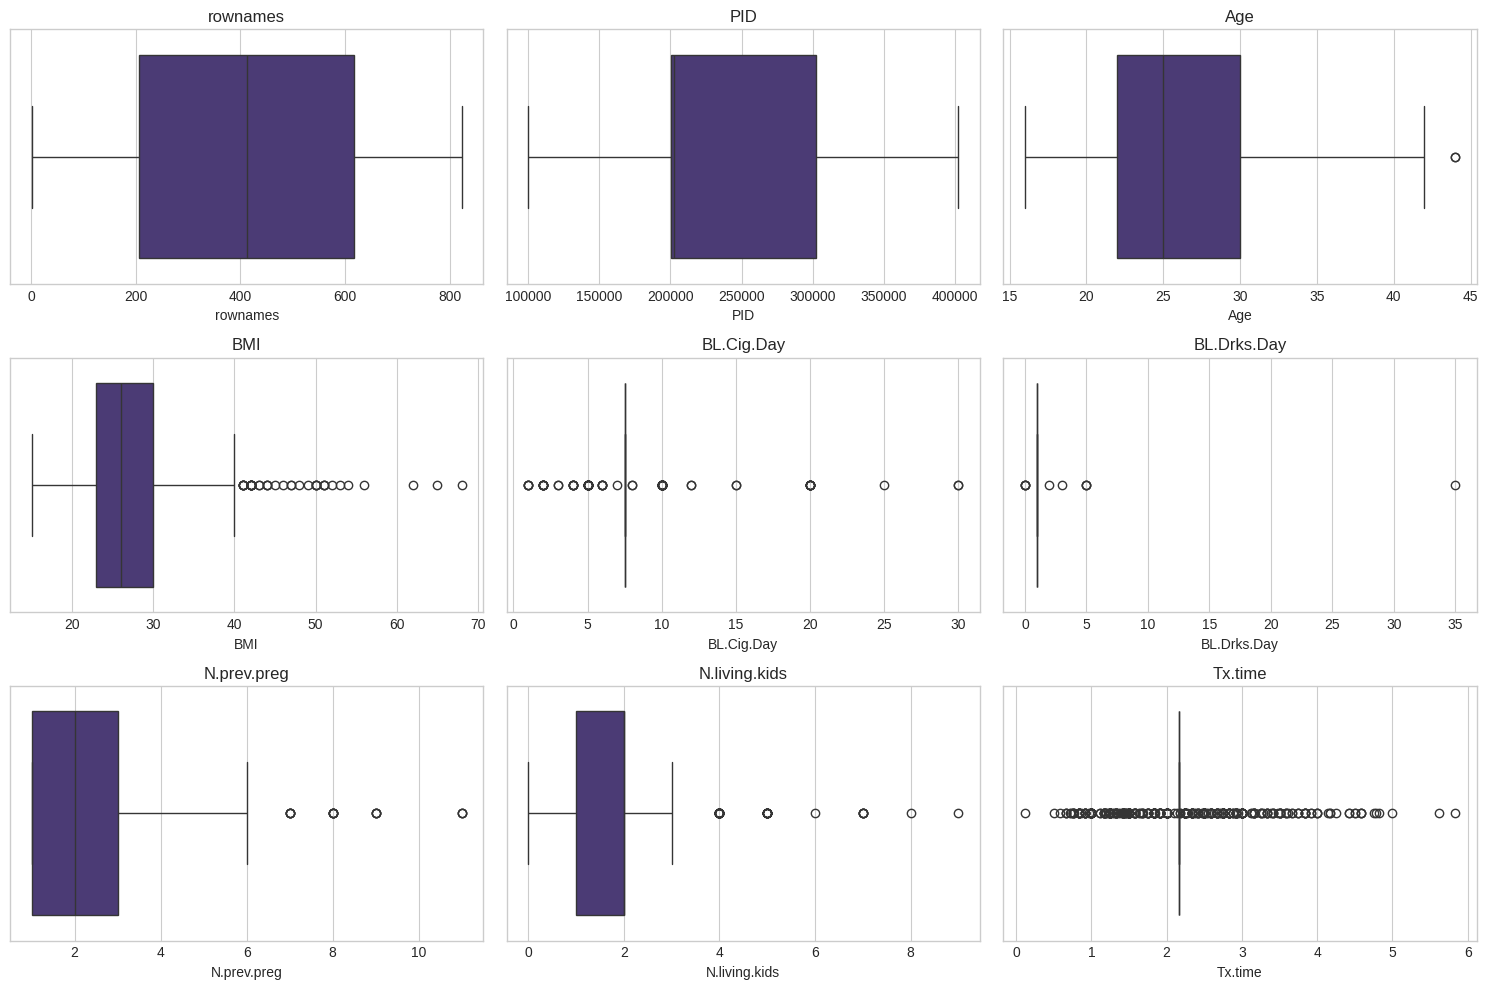


--- Feature Engineering ---
Potential date columns found: ['BL.Cig.Day', 'BL.Drks.Day', 'Tx.time']
Extracted year, month, day from BL.Cig.Day
Extracted year, month, day from BL.Drks.Day
Extracted year, month, day from Tx.time

--- Exploratory Data Analysis ---

1D Visualization - Distribution of numeric variables


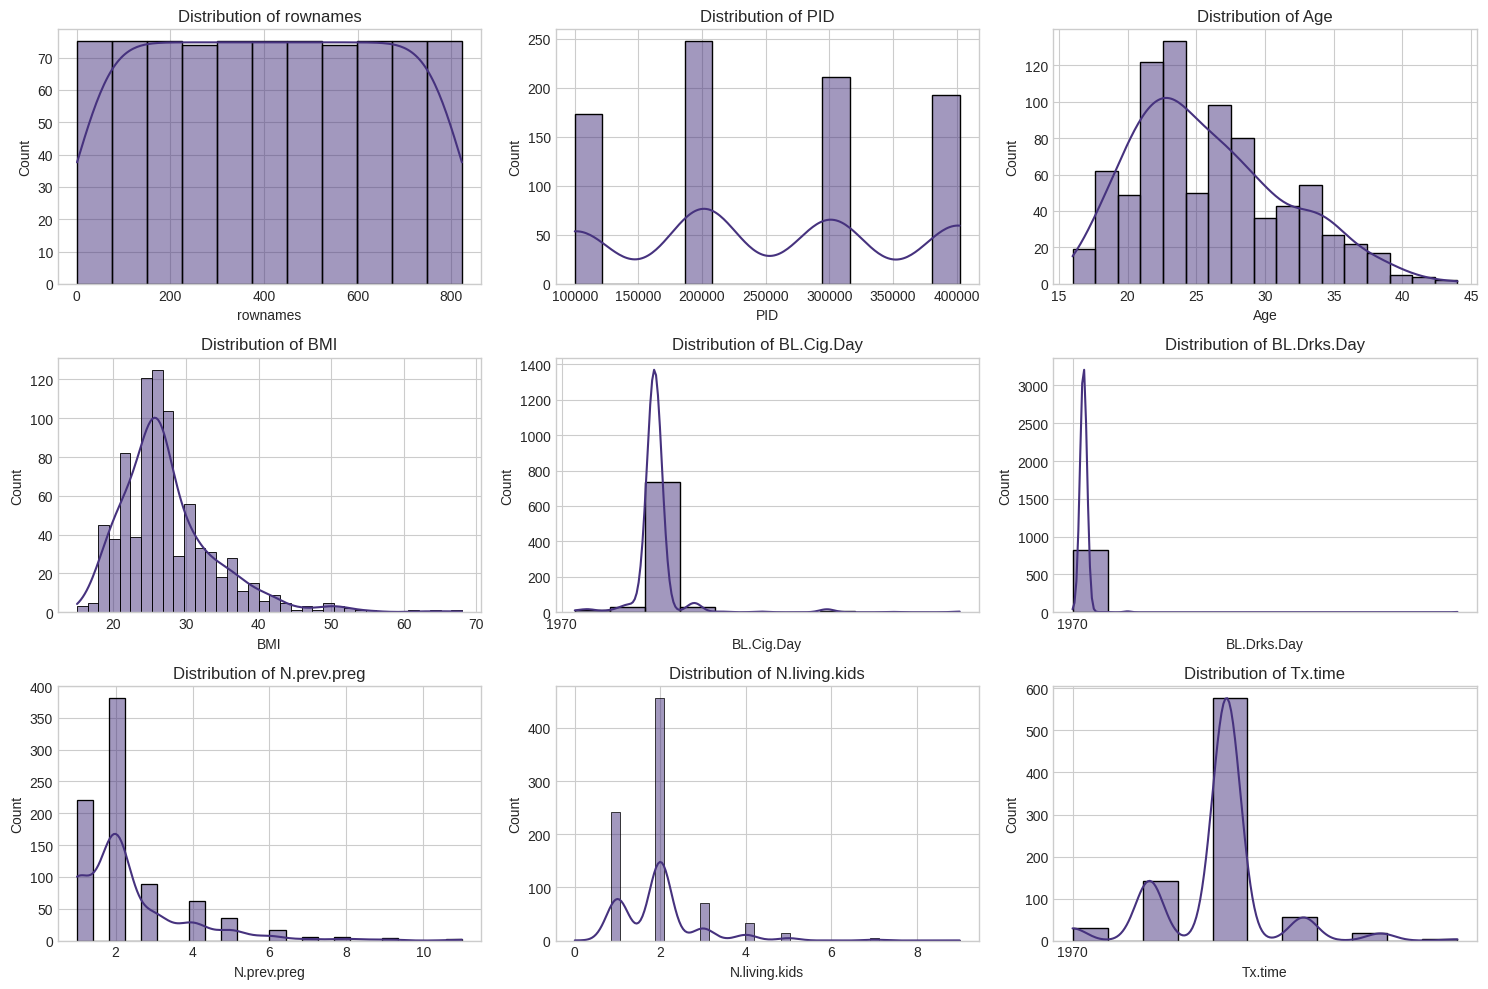


Distribution of categorical variables:


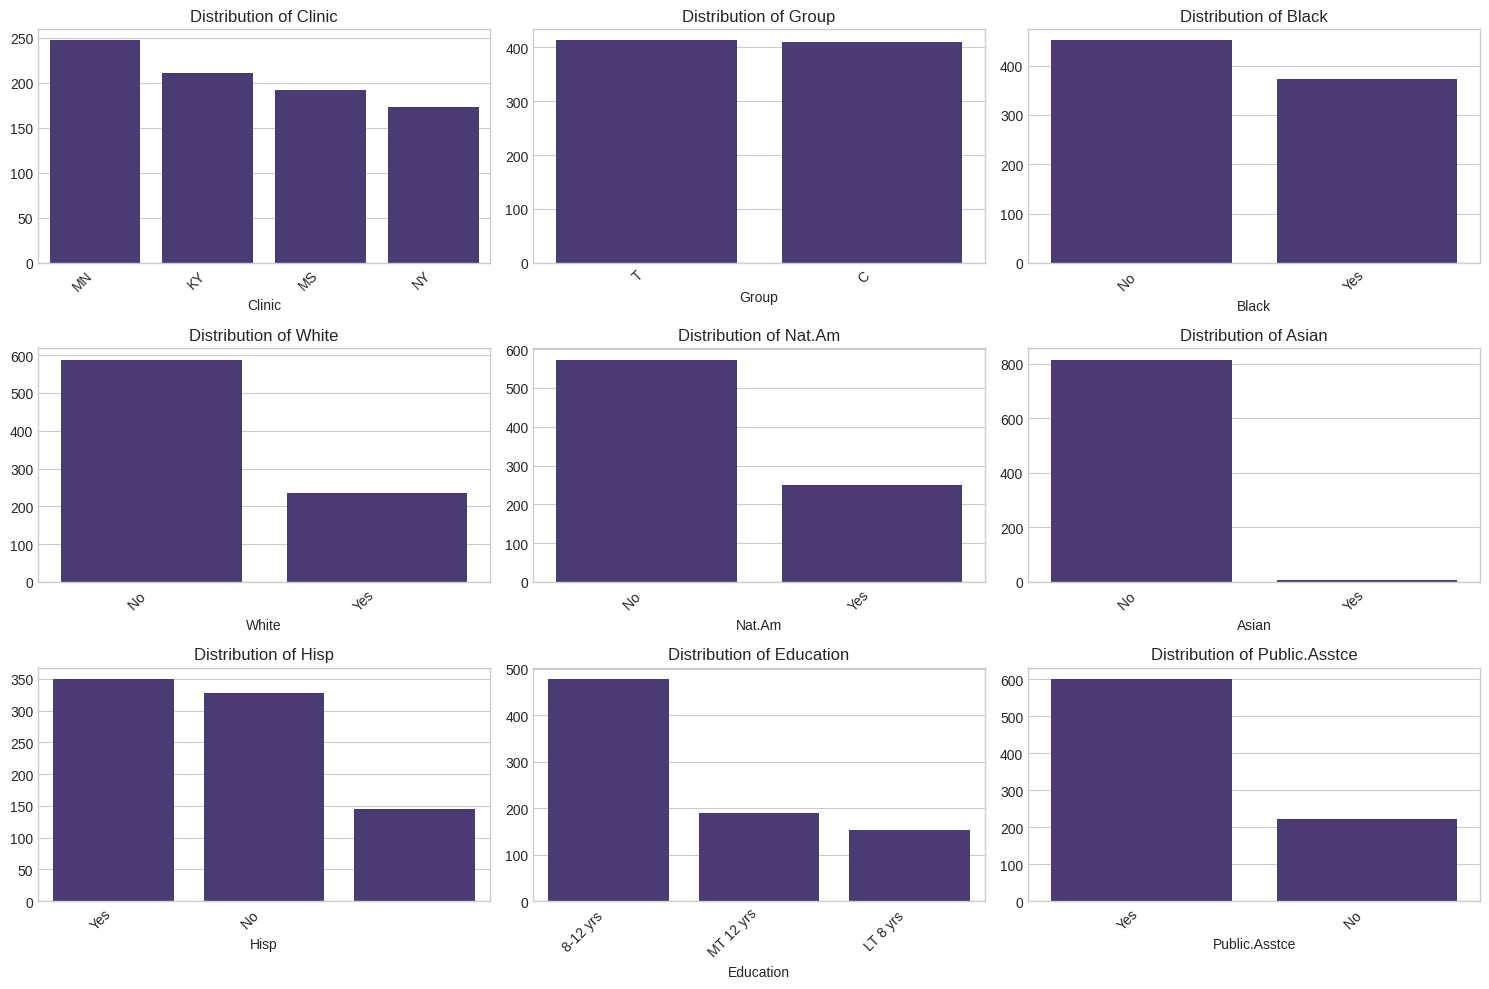


2D Visualization - Correlation Matrix


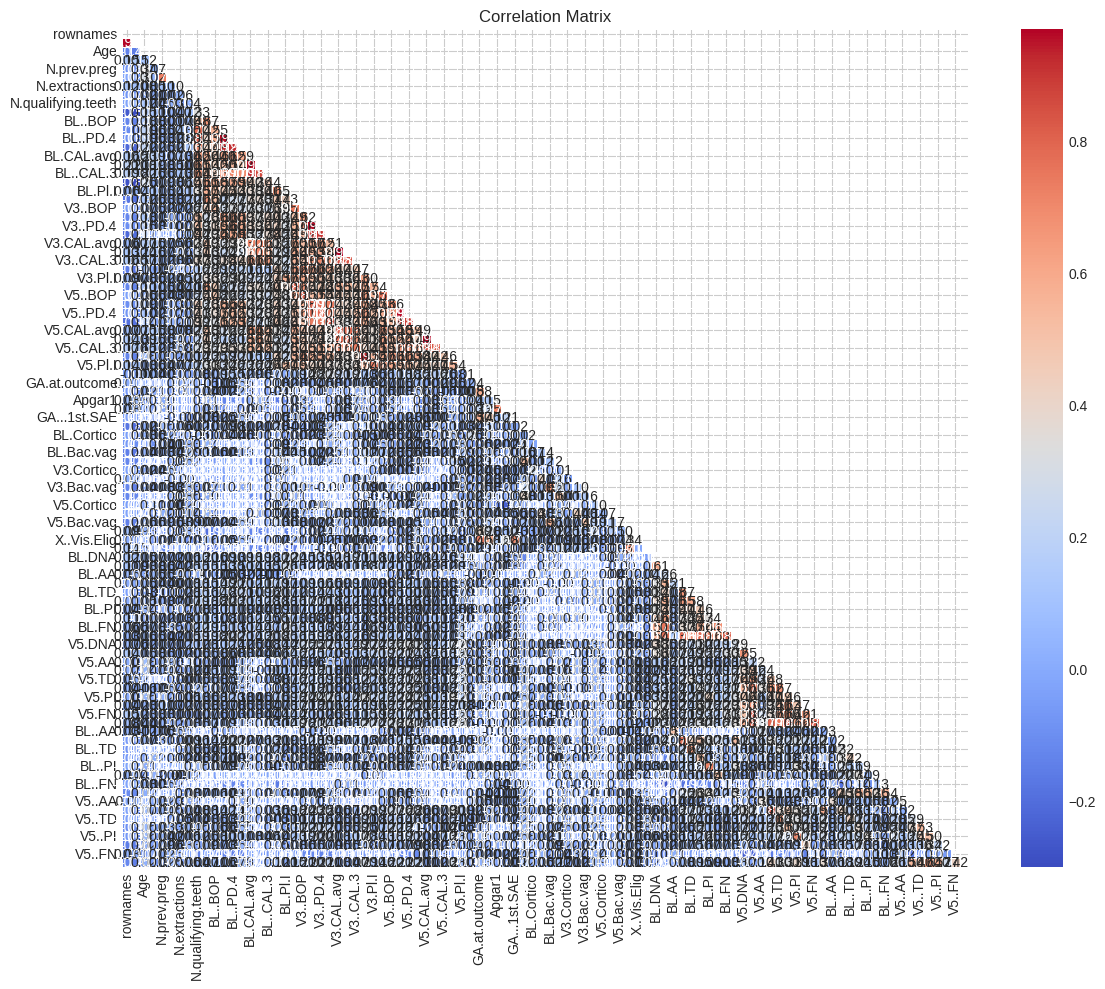


Potential target variables identified: ['BL.Cig.Day', 'BL.Drks.Day', 'N.qualifying.teeth']
Using BL.Cig.Day as the target variable
Target column 'BL.Cig.Day' not found in correlation matrix. Skipping scatter plots.

--- Dimensionality Reduction with PCA ---

Explained variance ratio by principal components:
PC1: 0.1772 (17.72%)
PC2: 0.0819 (8.19%)
PC3: 0.0549 (5.49%)
PC4: 0.0456 (4.56%)
PC5: 0.0362 (3.62%)
PC6: 0.0343 (3.43%)
PC7: 0.0316 (3.16%)
PC8: 0.0275 (2.75%)
PC9: 0.0247 (2.47%)
PC10: 0.0225 (2.25%)
PC11: 0.0212 (2.12%)
PC12: 0.0194 (1.94%)
PC13: 0.0184 (1.84%)
PC14: 0.0175 (1.75%)
PC15: 0.0174 (1.74%)
PC16: 0.0169 (1.69%)
PC17: 0.0157 (1.57%)
PC18: 0.0150 (1.50%)
PC19: 0.0144 (1.44%)
PC20: 0.0140 (1.40%)
PC21: 0.0135 (1.35%)
PC22: 0.0128 (1.28%)
PC23: 0.0126 (1.26%)
PC24: 0.0118 (1.18%)
PC25: 0.0109 (1.09%)
PC26: 0.0105 (1.05%)
PC27: 0.0102 (1.02%)
PC28: 0.0099 (0.99%)
PC29: 0.0096 (0.96%)
PC30: 0.0095 (0.95%)
PC31: 0.0089 (0.89%)
PC32: 0.0084 (0.84%)
PC33: 0.0081 (0.81%)
PC34:

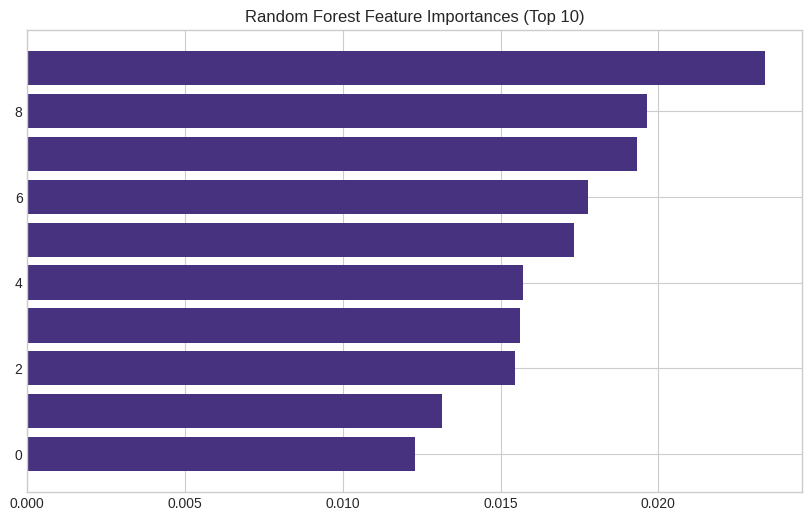


Training Gradient Boosting...
Gradient Boosting Results:
  MSE: 2.8847
  RMSE: 1.6984
  MAE: 0.4722
  R²: 0.0080

Model Performance Comparison:
                        MSE      RMSE       MAE        R²
Linear Regression  3.284097  1.812208  1.058678 -0.129393
Random Forest      3.096869  1.759792  0.467152 -0.065006
Gradient Boosting  2.884714  1.698445  0.472159  0.007954

Best model based on R² score: Gradient Boosting

Analysis complete!


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set the style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# 1. Data Loading
print("Loading dataset...")
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/opt.csv"
df = pd.read_csv(url)

# Display basic information about the dataset
print("\nDataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

# Display data types and missing values information
print("\nData Types and Missing Values:")
print(df.info())
print("\nMissing Values Count:")
print(df.isnull().sum())

# Display statistical summary
print("\nStatistical Summary:")
print(df.describe())

# 2. Data Cleaning
print("\n--- Data Cleaning ---")

# Check for duplicate rows
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Handle missing values
print("\nHandling missing values...")
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Impute missing numeric values with median
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        print(f"Imputing {df[col].isnull().sum()} missing values in {col} with median")
        df[col].fillna(df[col].median(), inplace=True)

# Impute missing categorical values with mode
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        print(f"Imputing {df[col].isnull().sum()} missing values in {col} with mode")
        df[col].fillna(df[col].mode()[0], inplace=True)

# Check for outliers in numeric columns
print("\nChecking for outliers in numeric columns...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    if i < 9:  # Limit to 9 subplots for clarity
        plt.subplot(3, 3, i+1)
        sns.boxplot(x=df[col])
        plt.title(col)
plt.tight_layout()
plt.savefig('outliers_boxplot.png')
plt.show()
plt.close()

# 3. Feature Engineering
print("\n--- Feature Engineering ---")

# Check if there are date/time columns for time series analysis
date_columns = [col for col in df.columns if any(date_term in col.lower() for date_term in ['date', 'time', 'year', 'month', 'day'])]
if date_columns:
    print(f"Potential date columns found: {date_columns}")
    # Example transformation for a date column (adjust based on actual data)
    for date_col in date_columns:
        try:
            df[date_col] = pd.to_datetime(df[date_col])
            df[f'{date_col}_year'] = df[date_col].dt.year
            df[f'{date_col}_month'] = df[date_col].dt.month
            df[f'{date_col}_day'] = df[date_col].dt.day
            print(f"Extracted year, month, day from {date_col}")
        except:
            print(f"Could not convert {date_col} to datetime format")
else:
    print("No obvious date columns found for time series analysis")

# 4. Exploratory Data Analysis (EDA)
print("\n--- Exploratory Data Analysis ---")

# 1D Visualization
print("\n1D Visualization - Distribution of numeric variables")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    if i < 9:  # Limit to 9 subplots for clarity
        plt.subplot(3, 3, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('numeric_distributions.png')
plt.show()
plt.close()

# Display categorical variables
if len(categorical_columns) > 0:
    print("\nDistribution of categorical variables:")
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_columns):
        if i < 9:  # Limit to 9 subplots for clarity
            plt.subplot(3, 3, i+1)
            value_counts = df[col].value_counts()
            if len(value_counts) > 10:  # If too many categories, show top 10
                value_counts = value_counts.nlargest(10)
                plt.title(f'Top 10 values in {col}')
            else:
                plt.title(f'Distribution of {col}')
            sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('categorical_distributions.png')
    plt.show()
    plt.close()

# 2D Visualization - Correlation matrix
print("\n2D Visualization - Correlation Matrix")
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()

# Identify potential target variables based on correlation
potential_targets = []
for col in numeric_columns:  # Iterate through numeric columns only
    # Check if the column name suggests it could be a target
    if any(term in col.lower() for term in ['price', 'target', 'output', 'y', 'dependent', 'response']):
        potential_targets.append(col)

if potential_targets:
    print(f"\nPotential target variables identified: {potential_targets}")
    target_col = potential_targets[0]  # Choose the first potential target for demonstration
else:
    # If no obvious target, use the last numeric column
    target_col = numeric_columns[-1]
    print(f"\nNo obvious target variable found. Using {target_col} for demonstration purposes.")

print(f"Using {target_col} as the target variable")

# Scatter plots for target variable relationship with top correlated features
# Ensure target_col is in corr_matrix columns
if target_col in corr_matrix.columns:
    correlations = corr_matrix[target_col].sort_values(ascending=False)
    top_correlated = correlations[correlations.index != target_col].nlargest(5).index.tolist()

    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(top_correlated):
        plt.subplot(2, 3, i + 1)
        sns.scatterplot(x=df[feature], y=df[target_col])
        plt.title(f'{feature} vs {target_col}')
        plt.xlabel(feature)
        plt.ylabel(target_col)
    plt.tight_layout()
    plt.savefig('scatter_plots.png')
    plt.show()
    plt.close()
else:
    print(f"Target column '{target_col}' not found in correlation matrix. Skipping scatter plots.")
# 5. Dimensionality Reduction (PCA)
print("\n--- Dimensionality Reduction with PCA ---")
# Select only numeric features for PCA
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target_col in numeric_features:
    numeric_features.remove(target_col)

# Apply PCA
if len(numeric_features) > 1:  # PCA requires at least 2 features
    X = df[numeric_features].values

    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Plot explained variance ratio
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    plt.grid(True)
    plt.savefig('pca_explained_variance.png')
    plt.close()

    # Display explained variance for each component
    print("\nExplained variance ratio by principal components:")
    for i, var in enumerate(pca.explained_variance_ratio_):
        print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

    # Determine optimal number of components (e.g., explaining 95% of variance)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumsum >= 0.95) + 1
    print(f"\nNumber of components explaining 95% of variance: {n_components}")

    # Visualize first two principal components
    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('First Two Principal Components')
    plt.savefig('pca_visualization.png')
    plt.close()

    # Create a new dataframe with PCA components for later use in modeling
    pca_components = pd.DataFrame(
        X_pca[:, :n_components],
        columns=[f'PC{i+1}' for i in range(n_components)]
    )

    # Visualize feature importance in first two components
    plt.figure(figsize=(12, 8))
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
        index=numeric_features
    )
    sns.heatmap(loadings.iloc[:, :2], annot=True, cmap='coolwarm')
    plt.title('Feature Loadings in PC1 and PC2')
    plt.savefig('pca_feature_loadings.png')
    plt.close()
else:
    print("Not enough numeric features for PCA")

# 6. Model Building
print("\n--- Model Building ---")

# Define features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# Preprocessing for numerical and categorical data
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ],
    remainder='drop'
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Create pipeline with preprocessor and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Results:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")

    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

    # For Random Forest, get feature importances
    if name == 'Random Forest':
        # Extract the trained model from the pipeline
        rf_model = pipeline.named_steps['model']

        # Get feature names after preprocessing (this is complex due to one-hot encoding)
        # We'll handle numeric features only for simplicity
        top_features_idx = np.argsort(rf_model.feature_importances_)[-10:]

        # Plot feature importances
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(top_features_idx)), rf_model.feature_importances_[top_features_idx])
        plt.title('Random Forest Feature Importances (Top 10)')
        plt.savefig('feature_importances.png')
        plt.show()
        plt.close()

# Compare model performances
performance_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(performance_df)

# Plot model comparison
plt.figure(figsize=(12, 8))
sns.barplot(data=performance_df.reset_index(), x='index', y='R²')
plt.title('Model Comparison - R²')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.close()

# Find the best model based on R²
best_model = performance_df['R²'].idxmax()
print(f"\nBest model based on R² score: {best_model}")

print("\nAnalysis complete!")